<a href="https://colab.research.google.com/github/iVechey/ConvolutionalNeuralNetworks/blob/main/Coursera_IntroToTensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **WEEK 1**

Imports

In [ ]:
import tensorflow as tf
import numpy as np
from tensorflow import keras

print(tf.__version__)

2.8.2


Define and Compile the Neural Network

In [ ]:
#Build a simple Sequential model
model = tf.keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])

#we need a loss and an optimizer function 
model.compile(optimizer = 'sgd', loss = 'mean_squared_error')



Provide The Data

In [ ]:
#inputs and outputs for training
xs = np.array([-1.0,  0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
ys = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)



Training and Making a Prediction

In [ ]:
#Train the Neural Network
model.fit(xs, ys, epochs=200) #loss = .202
print(model.predict([10.0])) #18.5
model.fit(xs, ys, epochs=800) #1.04^-9
print(model.predict([10.0])) #18.9999985

In [ ]:

#house prices
def house_model():
    ### START CODE HERE
    
    # Define input and output tensors with the values for houses with 1 up to 6 bedrooms
    # Hint: Remember to explictly set the dtype as float
    #x represents bedrooms | y represents price in 100,000's
    xs = np.array([0.0, 1.0, 2.0, 3.0,4.0,5.0,6.0], dtype = float)
    ys = np.array([.5, 1, 1.5, 2, 2.5, 3, 3.5], dtype = float)
    
    # Define your model (should be a model with 1 dense layer and 1 unit)
    model = tf.keras.Sequential([keras.layers.Dense(units = 1, input_shape = [1])])
    
    # Compile your model
    # Set the optimizer to Stochastic Gradient Descent
    # and use Mean Squared Error as the loss function
    model.compile(optimizer='sgd', loss='mean_squared_error')
    
    # Train your model for 1000 epochs by feeding the i/o tensors
    model.fit(xs, ys, epochs=1000)
    
    ### END CODE HERE
    return model
    

In [ ]:
model = house_model()

In [ ]:
test_y = 7.0
print(model.predict([test_y]))

[[4.0011272]]


# **WEEK 2**

Let's start learning about computer vision using fashion MNIST

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)


2.8.2


Load the fashion dataset
0: t-shirt
1: trouser
2: pullover
3: dress
4: coat
5: sandal
6: shirt
7: sneaker
8: bag
9: ankle boot

In [ ]:
#Load the Fashion MNIST dataset 28x28 pixel data
fmnist = tf.keras.datasets.fashion_mnist
#load the training and test split

(train_images, train_labels), (test_images, test_labels) = fmnist.load_data()


LABEL: 8

IMAGE PIXEL ARRAY:
 [[  0   0   0   0   0   0   0   0   0   1   0   0  18 107 119 103   9   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  99 155 113  61 118 173 117   0   0   3   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0 110 136   0   0   0   0   0 167 159   0   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0   6   0  72 147   0   0   5   0   2   0   0 174 118   0   5   0   0   0   0   0   0]
 [  0   0   0   0   0   1   5   0   0 174   4   0   4   0   0   0   0   0   0 204  44   0   4   0   0   0   0   0]
 [  0   0   0   0   0   0   8   0 125 128   0   9   0   0   0   0   0   2   0 107 152   0   6   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 184   9   0   4   0   0   0   0   0   2   0   0 190   0   0   2   0   0   0   0]
 [  0   0   0   1   0   2   0  73 158   0   0   0   0   1   0   0   0   0   4   0 157  79   0   3   1   0   0   0]
 [  0   0   2   5   1   0   0 157  98   0   2   0 

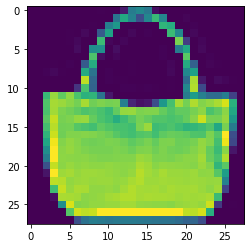

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#range(0,59999)
#index represents the image in the dataset
index = 100

np.set_printoptions(linewidth = 320)
#print the label and image
print(f'LABEL: {train_labels[index]}')
print(f'\nIMAGE PIXEL ARRAY:\n {train_images[index]}')

#visualize the image
plt.imshow(train_images[index])

In [ ]:
#normalize the pizel values
train_images = train_images/255.0
test_images = test_images/255.0

In [ ]:
#build the classification model
#each time we use a dense function, we need to use an activation function
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(),
                                    #28 * 28 = 128
                                    tf.keras.layers.Dense(128, activation= tf.nn.relu),
                                    #10 = range(0,9)
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])


In [ ]:
#code snippet to see how softmax works

#declare sample inputs
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

#feed inputs into the softmax function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

#get the sum of all the values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

#get index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [ ]:
model.compile(optimizer = tf.optimizers.Adam(),
              loss = 'sparse_categorical_crossentropy',
              metrics = ['accuracy'])
model.fit(train_images, train_labels, epochs = 5)

Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5017 - accuracy: 0.8244
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3760 - accuracy: 0.8647
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3362 - accuracy: 0.8771
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3149 - accuracy: 0.8850
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2962 - accuracy: 0.8910


In [ ]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 56.8463 - accuracy: 0.8560


[56.846317291259766, 0.8560000061988831]

Exploration exercises

In [ ]:
#exercise 1

classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])
#this means taht the values in classifications are the probabilities of each item is in the index

[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
9


In [ ]:
#exercise 2

mnist = tf.keras.datasets.mnist

(training_images, training_labels) ,  (test_images, test_labels) = mnist.load_data()

training_images = training_images/255.0
test_images = test_images/255.0

#adding Dense layers before the final layer can be helpful/necessary with more complex data
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(), #try removing this layer
                                    tf.keras.layers.Dense(1024, activation=tf.nn.relu), # Try experimenting with this layer
                                    tf.keras.layers.Dense(10, activation=tf.nn.softmax)])

model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy')

#trying larger epochs will get you a much better loss that one with 5
#however, if you were to try a really large number, you'll see the the number stop decreasing and sometimees
#even increase, this is called 'overfitting' 
model.fit(training_images, training_labels, epochs=5)

model.evaluate(test_images, test_labels)

classifications = model.predict(test_images)

print(classifications[0])
print(test_labels[0])

Epoch 1/5
 131/1875 [=>............................] - ETA: 12s - loss: 0.5475

KeyboardInterrupt: ignored

In [ ]:
#What about not normalizing the data? 
mnist = tf.keras.datasets.mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
#training_images=training_images/255.0 # Experiment with removing this line
#test_images=test_images/255.0 # Experiment with removing this line
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy')
model.fit(training_images, training_labels, epochs=5)
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)
print(classifications[0])
print(test_labels[0])

Epoch 1/5
1875/1875 [==============================] - 8s 4ms/step - loss: 2.5634
Epoch 2/5
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3390
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2990
Epoch 4/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2653
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.4338
[5.0642980e-37 4.5193695e-24 7.0725891e-22 5.6825122e-28 0.0000000e+00 5.2025849e-28 0.0000000e+00 1.0000000e+00 9.5712021e-37 7.2147429e-32]
7


In [ ]:
#what if we want to keep doing epochs until we hit a desired value? So if we want 95% accuracy and hit
#that threshold after 3 iterations, why would we wait around for the others to finish

class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs = {}):
    if(logs.get('accuracy') >= .95):
      print("\n reached 95% accuracy so cancelling training!")
      self.model.stop_training = True

callbacks = myCallback()
mnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()
training_images=training_images/255.0
test_images=test_images/255.0
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(training_images, training_labels, epochs=12, callbacks=[callbacks])

Epoch 1/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4774 - accuracy: 0.8293
Epoch 2/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3615 - accuracy: 0.8679
Epoch 3/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3248 - accuracy: 0.8801
Epoch 4/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2966 - accuracy: 0.8902
Epoch 5/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2798 - accuracy: 0.8954
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2633 - accuracy: 0.9011
Epoch 7/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2534 - accuracy: 0.9062
Epoch 8/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2418 - accuracy: 0.9098
Epoch 9/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2317 - accuracy: 0.9128
Epoch 10/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.222

#Lab 2: Using Callbacks

In [ ]:
import tensorflow as tf

# Instantiate the dataset API
fmnist = tf.keras.datasets.fashion_mnist

# Load the dataset
(x_train, y_train),(x_test, y_test) = fmnist.load_data()

# Normalize the pixel values
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    '''
    Halts the training after reaching 60 percent accuracy

    Args:
      epoch (integer) - index of epoch (required but unused in the function definition below)
      logs (dict) - metric results from the training epoch
    '''

    # Check accuracy
    #if(logs.get('loss') < .4)
    if(logs.get('accuracy') >= 0.6):

      # Stop if threshold is met
      print("\n accuracy is greated then .6 so cancelling the training")
      #print("\nLoss is lower than 0.4 so cancelling training!")
      self.model.stop_training = True

# Instantiate class
callbacks = myCallback()

In [ ]:
# Define the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(512, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Compile the model
model.compile(optimizer=tf.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model with a callback
model.fit(x_train, y_train, epochs=10, callbacks=[callbacks])

Epoch 1/10
1874/1875 [============================>.] - ETA: 0s - loss: 0.4782 - accuracy: 0.8286
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 8s 4ms/step - loss: 0.4782 - accuracy: 0.8286


# **WEEK 3: convolutional layers and pooling**

In [ ]:
import tensorflow as tf

# Load the Fashion MNIST dataset
fmnist = tf.keras.datasets.fashion_mnist
(training_images, training_labels), (test_images, test_labels) = fmnist.load_data()

# Normalize the pixel values
training_images = training_images / 255.0
test_images = test_images / 255.0

# Define the model
model = tf.keras.models.Sequential([
                                    
  #add convolutions and max pooling
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu', input_shape = (28,28,1)), #use powers of 2 starting at 32, use a 3x3 grid or 5x5 grid dont use 2x2, 4x4 etc
  tf.keras.layers.MaxPooling2D(2,2), #this will take a 2x2 grid of pixels, find the largest one and convert all neighboring pixels to the largest
  tf.keras.layers.Conv2D(32, (3,3), activation = 'relu'),
  tf.keras.layers.MaxPooling2D(2,2),

  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dense(10, activation=tf.nn.softmax)
])

model.summary()
# Setup training parameters
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
print(f'\nMODEL TRAINING:')
model.fit(training_images, training_labels, epochs=5)

# Evaluate on the test set
print(f'\nMODEL EVALUATION:')
test_loss = model.evaluate(test_images, test_labels)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)               0         
                                                                 
 dense (Dense)               (None, 128)               1

Try running the training for more epochs -- say about 20, and explore the results. But while the results might seem really good, the validation results may actually go down, due to something called overfitting. In a nutshell, overfitting occurs when the network learns the data from the training set really well, but it's too specialised to only that data, and as a result is less effective at interpreting other unseen data. For example, if all your life you only saw red shoes, then when you see a red shoe you would be very good at identifying it. But blue suede shoes might confuse you... and you know you should never mess with my blue suede shoes.

In [ ]:
#visualizing the convolutions and pooling

print(test_labels[:100])

[9 2 1 1 6 1 4 6 5 7 4 5 7 3 4 1 2 4 8 0 2 5 7 9 1 4 6 0 9 3 8 8 3 3 8 0 7 5 7 9 6 1 3 7 6 7 2 1 2 2 4 4 5 8 2 2 8 4 8 0 7 7 8 5 1 1 2 3 9 8 7 0 2 6 2 3 1 2 8 4 1 8 5 9 5 0 3 2 0 6 5 3 6 7 1 8 0 1 4 2]


NameError: ignored

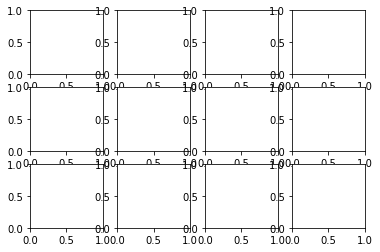

In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras import models

f, axarr = plt.subplots(3,4)

FIRST_IMAGE=0
SECOND_IMAGE=23
THIRD_IMAGE=28
CONVOLUTION_NUMBER = 1

layer_outputs = [layer.output for layer in model.layers]
activation_model = tf.keras.models.Model(inputs = model.input, outputs = layer_outputs)

for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

Try editing the convolutions. Change the 32s to either 16 or 64. What impact will this have on accuracy and/or training time.


**16: {training time: faster, accuracy less}**


**64: {training time: slower, accuracy a tad greater}** 

Remove the final Convolution. What impact will this have on accuracy or training time?

**significantly faster runtime, roughly the same accuracy**


How about adding more Convolutions? What impact do you think this will have? Experiment with it.

**adding a convolution at the end increased the accuracy**


**adding a second convolution at the end decreased the accuracy from above**


**adding one to the beggining and the end gave us really good results .9347**


**only having 2 in the beginning and then 1 gave us .9416**


**removing the end 1 gave us .9419**


**having 3 convolutions before the pooling gave us < .9419**


**having 3,1 gave us: <.9419**


**so our best convolution setup was 2 conv, then 2 poolings then a conv**


**if we remove a pooling we get: .956**


**now if we increase the convolutions to 128 we get .960 but runtime is very bad**


**our best one was 128, and removing pooling completely, but this is subject to overfitting**


Remove all Convolutions but the first. What impact do you think this will have? Experiment with it.

**nothing significant happened, roughly the same runtime and accuracy**


In the previous lesson you implemented a callback to check on the loss function and to cancel training once it hit a certain amount. See if you can implement that here.

Exploring Convolutions and Max Pooling: a deep dive

In [ ]:
from scipy import misc

# load the ascent image
ascent_image = misc.ascent()

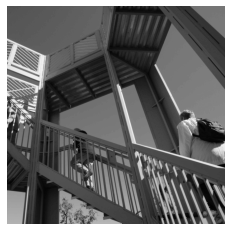

In [ ]:
import matplotlib.pyplot as plt

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(ascent_image)
plt.show()


In [ ]:
import numpy as np
#turns image into an array of RGB
image_transformed = np.copy(ascent_image)

size_x = image_transformed.shape[0]
size_y = image_transformed.shape[1]

# Experiment with different values and see the effect
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
# filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them






#if all digits > 1: brighter image
#if all digits < 0: darker image
weight  = 1

https://lodev.org/cgtutor/filtering.html

In [ ]:
# Iterate over the image
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (ascent_image[x-1, y-1] * filter[0][0])
      convolution = convolution + (ascent_image[x-1, y] * filter[0][1])  
      convolution = convolution + (ascent_image[x-1, y+1] * filter[0][2])     
      convolution = convolution + (ascent_image[x, y-1] * filter[1][0])    
      convolution = convolution + (ascent_image[x, y] * filter[1][1])    
      convolution = convolution + (ascent_image[x, y+1] * filter[1][2])    
      convolution = convolution + (ascent_image[x+1, y-1] * filter[2][0])    
      convolution = convolution + (ascent_image[x+1, y] * filter[2][1])    
      convolution = convolution + (ascent_image[x+1, y+1] * filter[2][2])    
      
      # Multiply by weight
      convolution = convolution * weight   
      
      # Check the boundaries of the pixel values
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255

      # Load into the transformed image
      image_transformed[x, y] = convolution

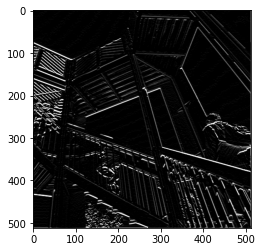

In [ ]:
#look at the image

plt.gray()
plt.grid(False)
plt.imshow(image_transformed)
plt.show()   

MAX POOLING

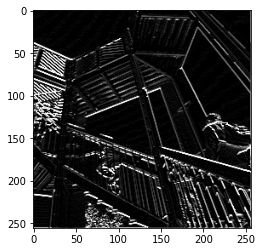

In [ ]:
# Assign dimensions half the size of the original image
new_x = int(size_x/2)
new_y = int(size_y/2)

# Create blank image with reduced dimensions
newImage = np.zeros((new_x, new_y))

# Iterate over the image
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    
    # Store all the pixel values in the (2,2) pool
    pixels = []
    pixels.append(image_transformed[x, y])
    pixels.append(image_transformed[x+1, y])
    pixels.append(image_transformed[x, y+1])
    pixels.append(image_transformed[x+1, y+1])

    # Get only the largest value and assign to the reduced image
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- it is now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
plt.show()      

**WEEK 4** Validation

More details in:

https://colab.research.google.com/drive/1q0r8HZ0k6XjuStcouS2vu6szVlK4cs_g

In [1]:
#download the training set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip

# Download the validation set
!wget https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip

PIXEL_X = 300
PIXEL_Y = 300

--2022-07-13 02:42:36--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 149574867 (143M) [application/zip]
Saving to: ‘horse-or-human.zip.1’

horse-or-human.zip. 100%[===================>] 142.65M   113MB/s    in 1.3s    

2022-07-13 02:42:38 (113 MB/s) - ‘horse-or-human.zip.1’ saved [149574867/149574867]

--2022-07-13 02:42:38--  https://storage.googleapis.com/tensorflow-1-public/course2/week3/validation-horse-or-human.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.128, 142.251.12.128, 172.217.194.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11480

In [2]:
import zipfile

# Unzip the dataset
local_zip = './horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./horse-or-human')

# Unzip validation set
local_zip = './validation-horse-or-human.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('./validation-horse-or-human')

zip_ref.close()

import os

# Directory with our training horse pictures
train_horse_dir = os.path.join('./horse-or-human/horses')

# Directory with our training human pictures
train_human_dir = os.path.join('./horse-or-human/humans')

# Directory with validation horse pictures
validation_horse_dir = os.path.join('./validation-horse-or-human/horses')

# Directory with validation human pictures
validation_human_dir = os.path.join('./validation-horse-or-human/humans')

In [3]:
train_horse_names = os.listdir(train_horse_dir)
print(train_horse_names[:10])

train_human_names = os.listdir(train_human_dir)
print(train_human_names[:10])

validation_horse_names = os.listdir(validation_horse_dir)
print(f'VAL SET HORSES: {validation_horse_names[:10]}')

validation_human_names = os.listdir(validation_human_dir)
print(f'VAL SET HUMANS: {validation_human_names[:10]}')

print(f'length of the horse pictures: {len(train_horse_names)}')
print(f'length of the human pictures: {len(train_human_names)}')

print(f'total validation horse images: {len(os.listdir(validation_horse_dir))}')
print(f'total validation human images: {len(os.listdir(validation_human_dir))}')

['horse12-9.png', 'horse21-1.png', 'horse13-9.png', 'horse42-4.png', 'horse03-8.png', 'horse11-6.png', 'horse39-7.png', 'horse44-0.png', 'horse10-3.png', 'horse34-8.png']
['human11-11.png', 'human02-25.png', 'human09-19.png', 'human04-08.png', 'human02-06.png', 'human17-00.png', 'human07-29.png', 'human07-01.png', 'human13-21.png', 'human12-08.png']
VAL SET HORSES: ['horse4-588.png', 'horse2-441.png', 'horse5-076.png', 'horse2-383.png', 'horse2-201.png', 'horse5-514.png', 'horse2-011.png', 'horse5-018.png', 'horse1-436.png', 'horse5-164.png']
VAL SET HUMANS: ['valhuman02-23.png', 'valhuman02-07.png', 'valhuman04-07.png', 'valhuman04-10.png', 'valhuman03-04.png', 'valhuman02-04.png', 'valhuman01-10.png', 'valhuman03-06.png', 'valhuman05-20.png', 'valhuman01-11.png']
length of the horse pictures: 500
length of the human pictures: 527
total validation horse images: 128
total validation human images: 128


In [4]:
%matplotlib inline

import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

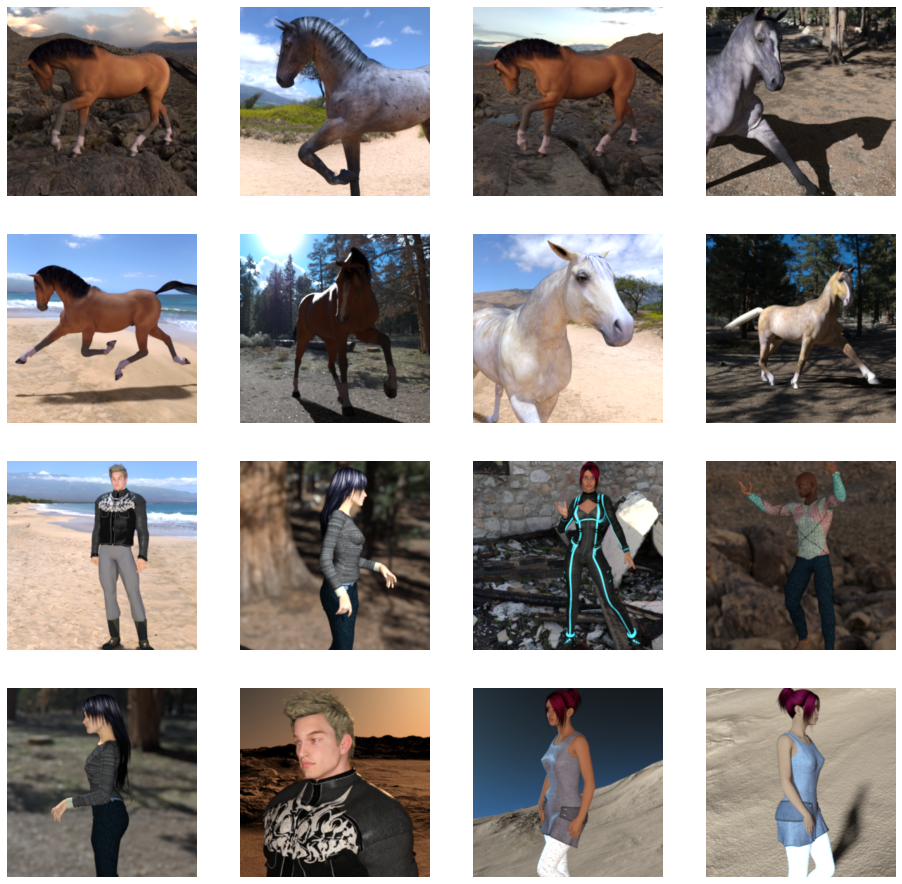

In [5]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_horse_pix = [os.path.join(train_horse_dir, fname) 
                for fname in train_horse_names[pic_index-8:pic_index]]
next_human_pix = [os.path.join(train_human_dir, fname) 
                for fname in train_human_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_horse_pix+next_human_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [6]:
import tensorflow as tf

In [7]:
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(PIXEL_X, PIXEL_Y, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid') #this is used for binary classifications
])

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 298, 298, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 149, 149, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 147, 147, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 73, 73, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 35, 35, 64)       0

In [9]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['accuracy'])

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        './horse-or-human/',  # This is the source directory for training images
        target_size=(PIXEL_X, PIXEL_Y),  # All images will be resized to 300x300
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 128 using validation_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        './validation-horse-or-human/',  # This is the source directory for validation images
        target_size=(PIXEL_X, PIXEL_Y),  # All images will be resized to 300x300
        batch_size=32,
        # Since you use binary_crossentropy loss, you need binary labels
        class_mode='binary')


Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [11]:
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 13s 950ms/step - loss: 0.7588 - accuracy: 0.4863 - val_loss: 0.6795 - val_accuracy: 0.5703
Epoch 2/15
8/8 [==============================] - 8s 1s/step - loss: 1.2002 - accuracy: 0.7564 - val_loss: 0.8769 - val_accuracy: 0.5898
Epoch 3/15
8/8 [==============================] - 7s 1s/step - loss: 0.3410 - accuracy: 0.8476 - val_loss: 1.0416 - val_accuracy: 0.7188
Epoch 4/15
8/8 [==============================] - 8s 955ms/step - loss: 0.2525 - accuracy: 0.9092 - val_loss: 1.0653 - val_accuracy: 0.8125
Epoch 5/15
8/8 [==============================] - 7s 910ms/step - loss: 0.0906 - accuracy: 0.9711 - val_loss: 3.6019 - val_accuracy: 0.6094
Epoch 6/15
8/8 [==============================] - 8s 979ms/step - loss: 0.2998 - accuracy: 0.8999 - val_loss: 0.8508 - val_accuracy: 0.8203
Epoch 7/15
8/8 [==============================] - 7s 899ms/step - loss: 0.0829 - accuracy: 0.9722 - val_loss: 1.7017 - val_accuracy: 0.8086
Epoch 8/15
8/8 [=========

In [12]:
## CODE BLOCK FOR NON-SAFARI BROWSERS

import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(PIXEL_X, PIXEL_Y))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
    
  if classes[0]>0.5:
    print(fn + " is a human")
  else:
    print(fn + " is a horse")

KeyboardInterrupt: ignored

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:45: RuntimeWarning: invalid value encountered in true_divide


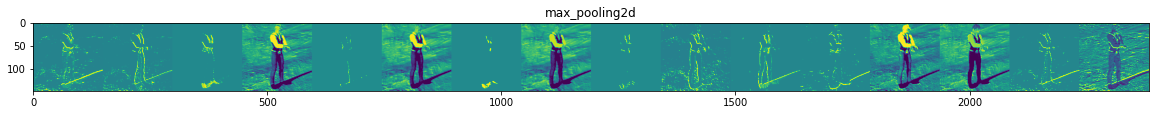

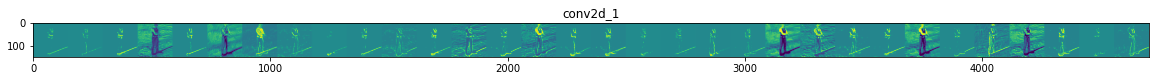

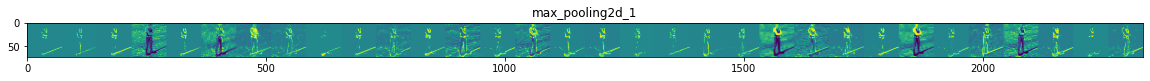

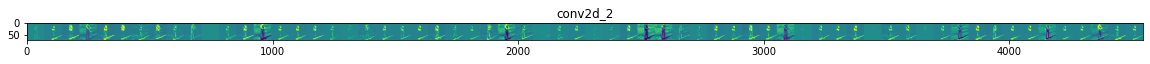

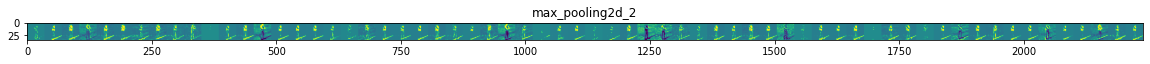

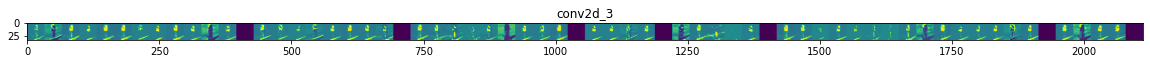

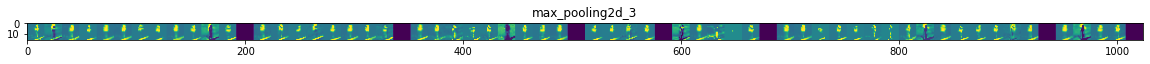

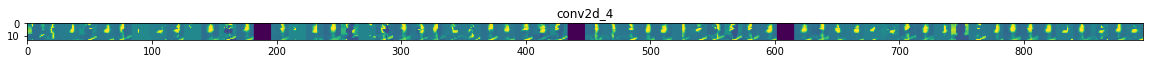

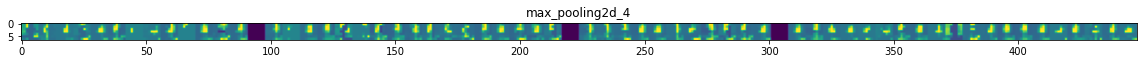

In [13]:
import numpy as np
import random
from tensorflow.keras.preprocessing.image import img_to_array, load_img

# Define a new Model that will take an image as input, and will output
# intermediate representations for all layers in the previous model after
# the first.
successive_outputs = [layer.output for layer in model.layers[1:]]
visualization_model = tf.keras.models.Model(inputs = model.input, outputs = successive_outputs)

# Prepare a random input image from the training set.
horse_img_files = [os.path.join(train_horse_dir, f) for f in train_horse_names]
human_img_files = [os.path.join(train_human_dir, f) for f in train_human_names]
img_path = random.choice(horse_img_files + human_img_files)

img = load_img(img_path, target_size=(300, 300))  # this is a PIL image
x = img_to_array(img)  # Numpy array with shape (300, 300, 3)
x = x.reshape((1,) + x.shape)  # Numpy array with shape (1, 300, 300, 3)

# Scale by 1/255
x /= 255

# Run the image through the network, thus obtaining all
# intermediate representations for this image.
successive_feature_maps = visualization_model.predict(x)

# These are the names of the layers, so you can have them as part of the plot
layer_names = [layer.name for layer in model.layers[1:]]

# Display the representations
for layer_name, feature_map in zip(layer_names, successive_feature_maps):
  if len(feature_map.shape) == 4:

    # Just do this for the conv / maxpool layers, not the fully-connected layers
    n_features = feature_map.shape[-1]  # number of features in feature map

    # The feature map has shape (1, size, size, n_features)
    size = feature_map.shape[1]
    
    # Tile the images in this matrix
    display_grid = np.zeros((size, size * n_features))
    for i in range(n_features):
      x = feature_map[0, :, :, i]
      x -= x.mean()
      x /= x.std()
      x *= 64
      x += 128
      x = np.clip(x, 0, 255).astype('uint8')
    
      # Tile each filter into this big horizontal grid
      display_grid[:, i * size : (i + 1) * size] = x
    
    # Display the grid
    scale = 20. / n_features
    plt.figure(figsize=(scale * n_features, scale))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')

In [ ]:
import os, signal
os.kill(os.getpid(), signal.SIGKILL)